<a href="https://colab.research.google.com/github/sudeepkanthala/ICP-6/blob/main/ICP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
15/15 [==============================] - 3s 70ms/step - loss: 0.5838 - accuracy: 0.6923 - val_loss: 0.4233 - val_accuracy: 0.9298
Epoch 2/20
15/15 [==============================] - 0s 16ms/step - loss: 0.3383 - accuracy: 0.9055 - val_loss: 0.2456 - val_accuracy: 0.9737
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 0.2141 - accuracy: 0.9341 - val_loss: 0.1612 - val_accuracy: 0.9737
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 0.1561 - accuracy: 0.9429 - val_loss: 0.1209 - val_accuracy: 0.9737
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 0.1252 - accuracy: 0.9516 - val_loss: 0.1004 - val_accuracy: 0.9737
Epoch 6/20
15/15 [==============================] - 0s 14ms/step - loss: 0.1060 - accuracy: 0.9626 - val_loss: 0.0882 - val_accuracy: 0.9825
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0911 - accuracy: 0.9714 - val_loss: 0.0797 - val_accuracy: 0.9825
Epoch 8/20
15/1

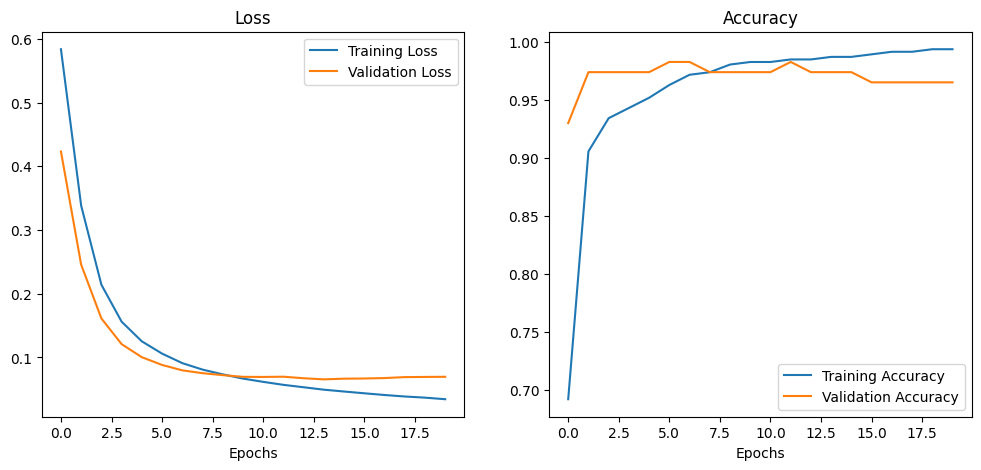

4/4 [==============================] - 0s 3ms/step
Test Accuracy: 0.96


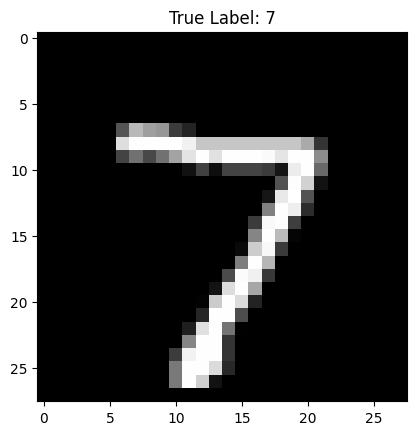

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3746 - accuracy: 0.8919 - val_loss: 0.2118 - val_accuracy: 0.9385
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1750 - accuracy: 0.9486 - val_loss: 0.1537 - val_accuracy: 0.9582
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1299 - accuracy: 0.9613 - val_loss: 0.1300 - val_accuracy: 0.9632
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1047 - accuracy: 0.9688 - val_loss: 0.1254 - val_accuracy: 0.9628
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0853 - accuracy: 0.9746 - val_loss: 0.1103 - val_accuracy: 0.9675
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.1157 - val_accuracy: 0.9668
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.1059 - val_accuracy: 0.9715
Epoch 

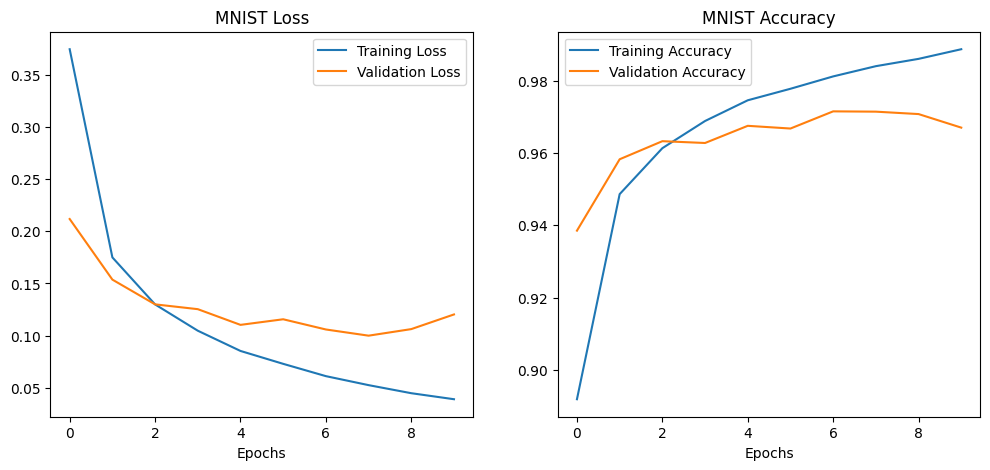

313/313 [==============================] - 1s 2ms/step - loss: 26.3804 - accuracy: 0.9606
MNIST Test Accuracy: 0.96
Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 2.5530 - accuracy: 0.5798 - val_loss: 0.8396 - val_accuracy: 0.7981
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7187 - accuracy: 0.8286 - val_loss: 0.5870 - val_accuracy: 0.8730
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4940 - accuracy: 0.8850 - val_loss: 0.4412 - val_accuracy: 0.8947
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3821 - accuracy: 0.9109 - val_loss: 0.4134 - val_accuracy: 0.9157
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3110 - accuracy: 0.9249 - val_loss: 0.3040 - val_accuracy: 0.9290
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2703 - accuracy: 0.9335 - val_loss: 0.3015 - val_accuracy: 0.9302
Epoch 7/10
750/750 [============

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the data
sc = StandardScaler()
X_normalized = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# You can add more Dense layers as requested
# model.add(Dense(16, activation='relu'))  # Uncomment to add more layers
# model.add(Dense(8, activation='relu'))   # Uncomment to add more layers
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Load MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
X_train_mnist = X_train_mnist / 255.0  # Normalize pixel values

# Plot one of the images from the test data
plt.figure()
plt.imshow(X_test_mnist[0], cmap='gray')
plt.title(f"True Label: {y_test_mnist[0]}")
plt.show()

# Reshape the MNIST data for neural network input
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

# Build a neural network model for MNIST
model_mnist = Sequential()
model_mnist.add(Dense(64, input_dim=X_train_mnist.shape[1], activation='relu'))
model_mnist.add(Dense(32, activation='relu'))
# You can change the number of hidden layers and activation functions as requested
# model_mnist.add(Dense(16, activation='tanh'))  # Uncomment to use tanh activation
# model_mnist.add(Dense(8, activation='sigmoid'))  # Uncomment to use sigmoid activation
model_mnist.add(Dense(10, activation='softmax'))

# Compile the MNIST model
model_mnist.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the MNIST model
history_mnist = model_mnist.fit(X_train_mnist, y_train_mnist, epochs=10, batch_size=64, validation_split=0.2)

# Plot loss and accuracy for MNIST
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.title('MNIST Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Evaluate the MNIST model on test data
test_loss, test_accuracy = model_mnist.evaluate(X_test_mnist, y_test_mnist)
print(f"MNIST Test Accuracy: {test_accuracy:.2f}")

# Run the same MNIST code without scaling the images
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Reshape the MNIST data for neural network input
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

# Build a new MNIST model without scaling
model_mnist_no_scaling = Sequential()
model_mnist_no_scaling.add(Dense(64, input_dim=X_train_mnist.shape[1], activation='relu'))
model_mnist_no_scaling.add(Dense(32, activation='relu'))
model_mnist_no_scaling.add(Dense(10, activation='softmax'))

# Compile the new MNIST model
model_mnist_no_scaling.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the new MNIST model
history_mnist_no_scaling = model_mnist_no_scaling.fit(X_train_mnist, y_train_mnist, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the new MNIST model on test data
test_loss_no_scaling, test_accuracy_no_scaling = model_mnist_no_scaling.evaluate(X_test_mnist, y_test_mnist)
print(f"MNIST Test Accuracy without Scaling: {test_accuracy_no_scaling:.2f}")
